In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

plt.style.use('seaborn-colorblind')

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
ds = pd.read_csv('amzn_stock.csv', sep=',',index_col=['Date'], parse_dates=['Date']) 
#загружаем исходный датасет, столбец дата преобразуем во временной формат и задаем в качестве столбца с индексами

## 1.Exploratory data analysis

In [56]:
ds

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,NaN,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [57]:
ds['2015-01']

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,312.58,314.75,306.96,308.52,2788101
2015-01-05,307.01,308.38,300.85,302.19,2774231
2015-01-06,302.24,303.00,292.38,295.29,3519034
2015-01-07,297.50,301.28,295.33,298.42,2640349
2015-01-08,300.32,303.14,296.11,300.46,3088398
2015-01-09,301.48,302.87,296.68,296.93,2592360
2015-01-12,297.56,298.51,289.28,291.41,3421392
2015-01-13,297.48,301.50,293.23,294.74,4136442
2015-01-14,291.93,295.91,286.50,293.27,5538666


In [58]:
#ds['Date'] = ds['Date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M')) #или другое преобразование в формат дат

In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1896 entries, 2010-01-04 to 2017-07-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1893 non-null   float64
 1   High    1895 non-null   float64
 2   Low     1895 non-null   float64
 3   Close   1893 non-null   float64
 4   Volume  1896 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 88.9 KB


In [60]:
ds.shape

(1896, 5)

In [61]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1893.0,3.784511e+02,2.336951e+02,105.92,198.330,301.48,521.07,1017.00
High,1895.0,3.815298e+02,2.347024e+02,111.29,200.875,304.46,527.71,1017.00
Low,1895.0,3.741050e+02,2.319952e+02,105.80,195.105,296.75,513.92,1006.11
Close,1893.0,3.780397e+02,2.332053e+02,108.61,198.360,300.75,521.10,1011.34
Volume,1896.0,4.531147e+06,3.020203e+06,986435.00,2733477.000,3770526.00,5305957.25,42421074.00


In [62]:
ds.isna().sum()

Open      3
High      1
Low       1
Close     3
Volume    0
dtype: int64

In [63]:
ds[ds.isna().any(axis=1)]

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-19,NaN,133.71,129.66,130.35,8906225
2010-03-23,130.89,130.94,NaN,129.26,4213607
2010-03-29,NaN,136.63,134.33,135.12,4627668
2010-04-14,140.34,144.50,139.20,NaN,7900274
2010-04-20,143.83,144.64,142.10,NaN,4314512
2010-04-23,NaN,149.09,142.42,143.63,18981078
2017-04-12,903.09,NaN,895.25,896.23,2456140
2017-07-11,993.00,995.99,983.72,NaN,2982726


In [64]:
figsize=(12,6)

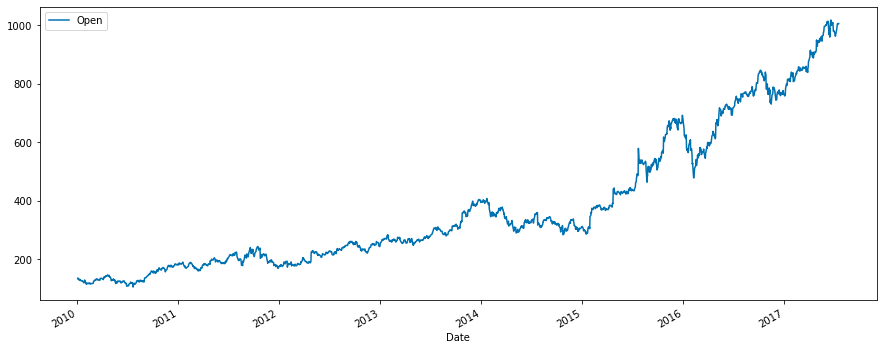

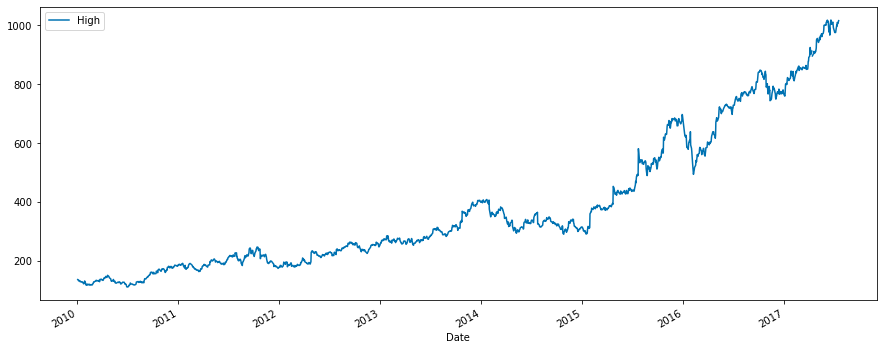

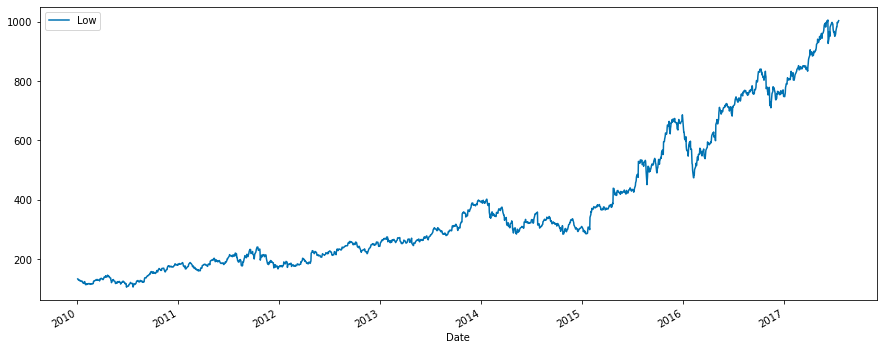

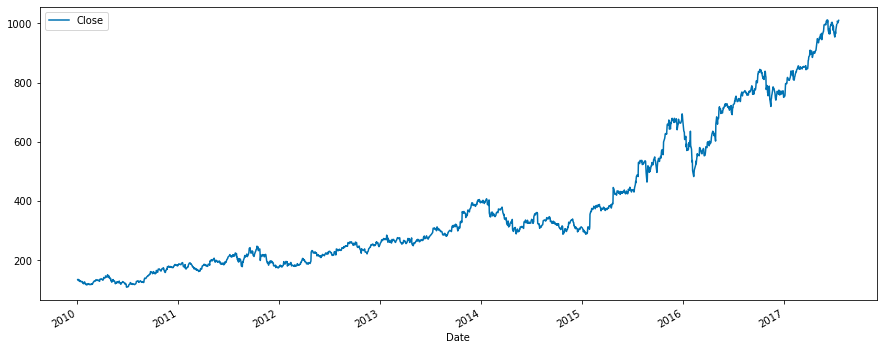

In [65]:
ds.plot(y="Open", figsize=(15,6));
ds.plot(y="High", figsize=(15,6));
ds.plot(y="Low", figsize=(15,6));
ds.plot(y="Close", figsize=(15,6));

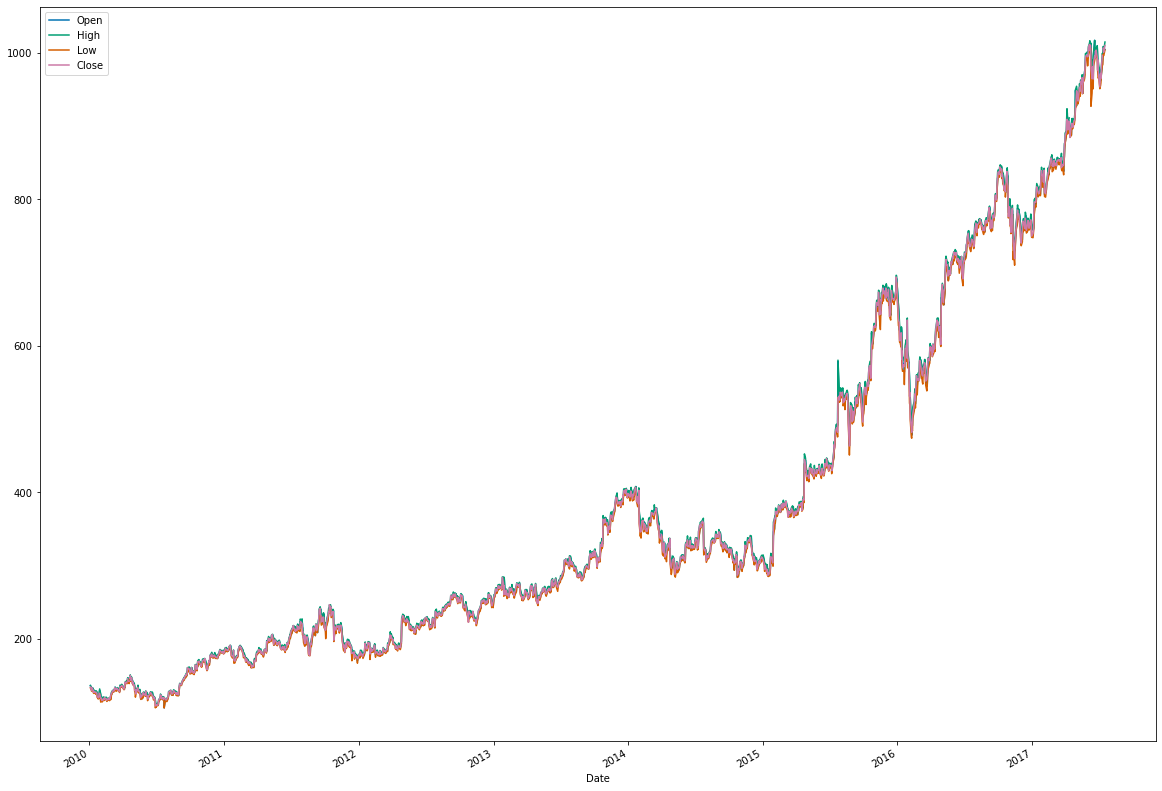

In [66]:
ds.drop(labels='Volume',axis=1).plot(figsize=(20,15)); #совмещенные графики

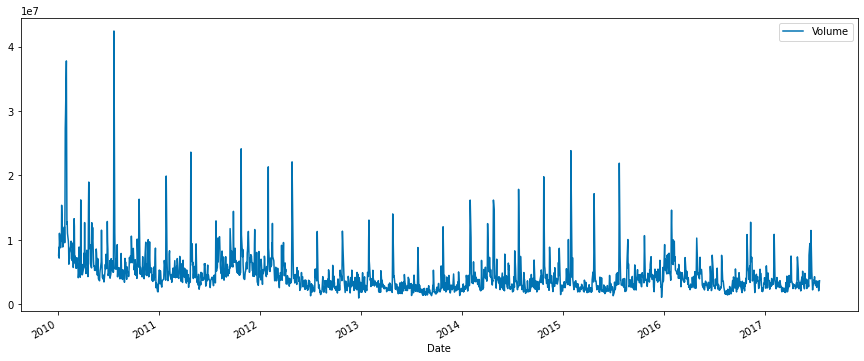

In [67]:
ds.plot(y='Volume', figsize=(15,6)); 

In [68]:
ds1 = ds.resample('W').mean() #перейдем к недельному интервалу и среднему значению на данном интервале
ds1

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


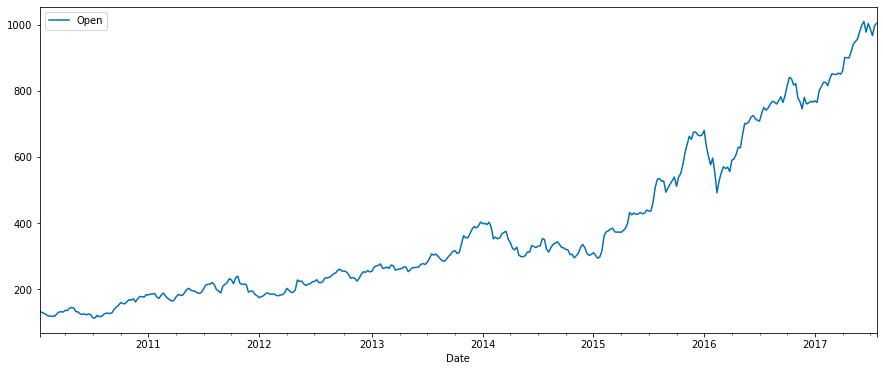

In [69]:
ds1.plot(y="Open", figsize=(15,6)); #ряд имеет ярко выраженный тренд

In [70]:
#!pip install pandas_profiling #установка
import pandas_profiling

In [318]:
pandas_profiling.ProfileReport(ds) # проведем развернутый разведочный анализ, воспользуемся функцией pandas_profiling

Таким образом, имеем, что ряд имеет ярко выраженный тренд, параметр стоимости открытия, закрытия и max|min имеют высокую корреляцию, что представляется логичным. Параметр объема денежных средств Volume за период не коррелирует с динамикой цены. В выборке установлено наличие пропущенных значений - 8. Из них по 3 в столбцах Open и Close, по 1 - в столбцах High и Low.

## 2.	Outliers detection (найти выбросы)

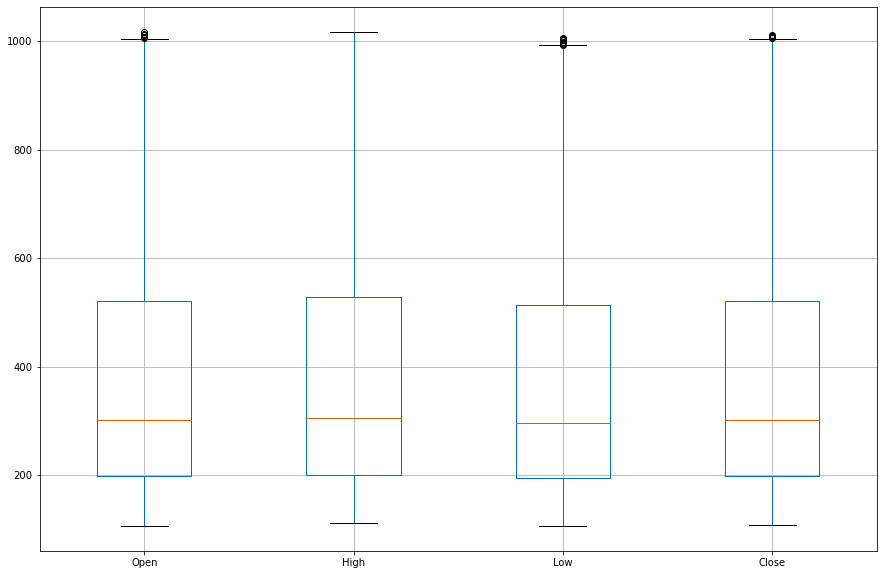

In [71]:
ds.drop(labels='Volume',axis=1).boxplot(figsize=(15,10)); #совмещенные графики

<AxesSubplot:>

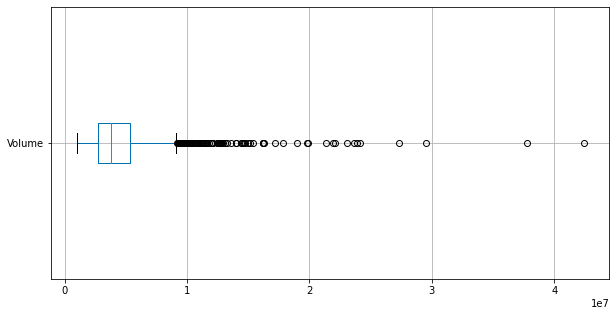

In [72]:
ds.boxplot(column=["Volume"], figsize=(10,5), vert=False)

In [73]:
Q1 =  ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
ds1=(ds < (Q1-1.5*IQR)) | (ds > (Q3+1.5*IQR))
ds1[ds1.any(axis=1)==1].value_counts()

Open   High   Low    Close  Volume
False  False  False  False  True      114
              True   False  False       6
True   False  True   True   False       3
              False  False  False       3
False  False  True   True   False       3
True   False  True   False  False       1
dtype: int64

In [74]:
ds1[ds1.any(axis=1)==1].index #все даты с выбросами

DatetimeIndex(['2010-01-07', '2010-01-08', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-21', '2010-01-22', '2010-01-25',
               '2010-01-26', '2010-01-27',
               ...
               '2017-06-16', '2017-06-19', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=130, freq=None)

In [75]:
ds1[ds1.any(axis=1)==1]

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-07,False,False,False,False,True
2010-01-08,False,False,False,False,True
2010-01-13,False,False,False,False,True
2010-01-14,False,False,False,False,True
2010-01-15,False,False,False,False,True
...,...,...,...,...,...
2017-06-26,True,False,False,False,False
2017-07-12,False,False,True,True,False
2017-07-13,False,False,True,False,False


Наибольшее количество выбросов выявлено по признаку Volume = 114 шт, по остальным на порядок меньше

## 3.	Gap filling (заполнить пропуски)

In [76]:
dsl = ds.interpolate(method='linear') #заполняем пропуски с помощью линейной интерполяции
dsl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [77]:
dsl.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [78]:
dsl

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,1001.49,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


## 4.	Smoothing/fitering (сгладить ряд)

In [79]:
#рассмотрим кривую Open, выводим в отдельную таблицу для удобства работы
dsl_open=dsl[['Open']]
dsl_open

,Open
Date,
2010-01-04,136.25
2010-01-05,133.43
2010-01-06,134.60
2010-01-07,132.01
2010-01-08,130.56
...,...
2017-07-11,993.00
2017-07-12,1000.65
2017-07-13,1004.62


In [80]:
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

In [81]:
#сглаживание по методу Gaussian1DKernel со стандартным отклонением в 2 пикселя
gauss_kernel = Gaussian1DKernel(2)
smoothed_ds_gauss = convolve(dsl_open['Open'], gauss_kernel)

In [82]:
#сглаживание по методу Box1DKernel шириной 5 пикселей
box_kernel = Box1DKernel(5)
smoothed_ds_box = convolve(dsl_open['Open'], box_kernel)

In [83]:
#Фильтр Савицкого-Голея
from scipy.signal import savgol_filter
sav_gol = savgol_filter(dsl_open['Open'], 51, 3)

In [84]:
#Кладем в одну таблицу
dsl_open['OGauss'] = smoothed_ds_gauss
dsl_open['OBoxD'] = smoothed_ds_box
dsl_open['OSavGol'] = sav_gol

In [85]:
dsl_open

,Open,OGauss,OBoxD,OSavGol
Date,,,,
2010-01-04,136.25,80.537949,80.856,135.748977
2010-01-05,133.43,103.780931,107.258,134.801493
2010-01-06,134.60,119.399499,133.370,133.859823
2010-01-07,132.01,127.310375,132.644,132.926045
2010-01-08,130.56,130.082833,131.756,132.002239
...,...,...,...,...
2017-07-11,993.00,978.130680,990.564,989.249370
2017-07-12,1000.65,956.676968,997.134,989.797222
2017-07-13,1004.62,895.737965,1001.072,990.504690


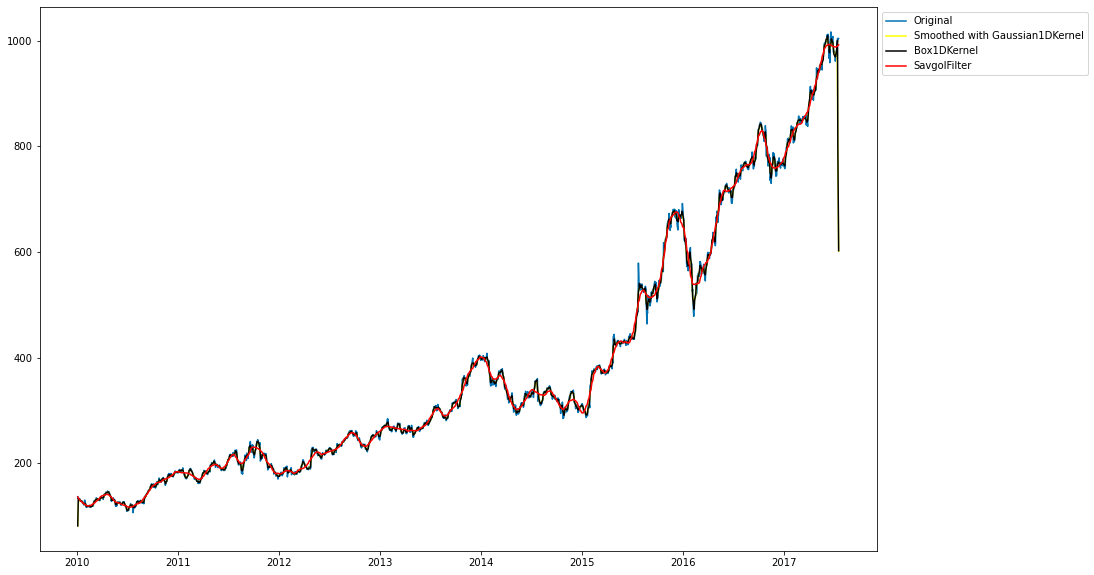

In [86]:
plt.figure(figsize=(15, 10))
plt.plot(dsl_open['Open'], label='Original')
plt.plot(dsl_open['OGauss'], label='Smoothed with Gaussian1DKernel', color='yellow')
plt.plot(dsl_open['OBoxD'], label='Box1DKernel', color='black')
plt.plot(dsl_open['OSavGol'], label='SavgolFilter', color='red')
plt.legend(bbox_to_anchor=(1, 1)) #задаем местоположение легенды
plt.show();

Проведено сглаживание различными методами. В целом наилучшее сглаживание получено по методу Box1Cernel, однако на конечнои участке наблюдается резкое изменение кривой. Таким образом, целесообразнее применять сглаживание, полученное с помощью фильтра Савицого-Голея

In [87]:
dsl

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,1001.49,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


## 5.	Data transformations 

In [37]:
from sklearn.model_selection import train_test_split

In [101]:
dslSG=dsl.copy()

In [102]:
dslSG

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,1001.49,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [103]:
sav_gol1 = savgol_filter(dslSG['Open'], 51, 3)
dslSG['OpenSG'] = sav_gol1
sav_gol2 = savgol_filter(dslSG['Close'], 51, 3)
dslSG['CloseSG'] = sav_gol2
sav_gol3 = savgol_filter(dslSG['High'], 51, 3)
dslSG['HighSG'] = sav_gol3
sav_gol4 = savgol_filter(dslSG['Low'], 51, 3)
dslSG['LowSG'] = sav_gol4
sav_gol5 = savgol_filter(dslSG['Volume'], 51, 3)
dslSG['VolumeSG'] = sav_gol5
dslSG.drop(columns=(['Open', 'Close', 'High', 'Low', 'Volume']), axis=1,inplace=True)

In [100]:
dslSG #датафрейм со сглаженными рядами

,OpenSG,HighSG,LowSG,VolumeSG
Date,,,,
2010-01-04,135.748977,136.814631,133.889535,4.858663e+06
2010-01-05,134.801493,135.881416,132.705916,6.287991e+06
2010-01-06,133.859823,134.956636,131.554379,7.593814e+06
2010-01-07,132.926045,134.042166,130.435966,8.780271e+06
2010-01-08,132.002239,133.139884,129.351724,9.851503e+06
...,...,...,...,...
2017-07-11,989.249370,996.376763,983.355786,3.125435e+06
2017-07-12,989.797222,997.289307,985.575748,2.942386e+06
2017-07-13,990.504690,998.398096,988.119483,2.745588e+06


In [104]:
dslSG_2=dslSG.copy()

In [105]:
# Разобъем выборку на обучающую и тестовую части
# В качестве целевой переменной расмотрим переменную Close, сглаженную по методу Савицкого-Голея
y=dslSG[['CloseSG']]
dslSG.drop(columns=['CloseSG'], axis=1,inplace=True)
X=dsl

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True) #задаем тестовую выборку 25% от начальной

In [107]:
#можно провести масштабирование - для каждого признака вычесть среднее значение признака и поделить на стандартное отклонение
from sklearn.preprocessing import StandardScaler

In [108]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## 6.	Dimensionality reduction (отбор информативных признаков)

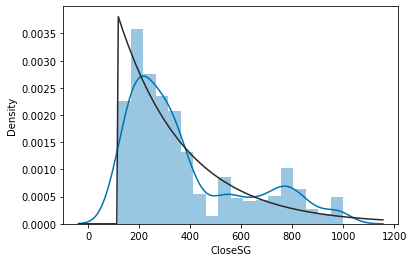

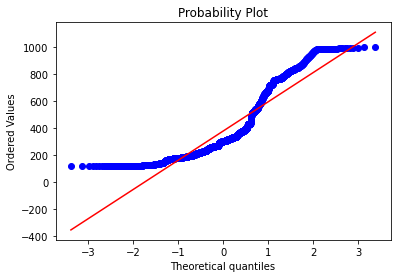

In [118]:
#рассмотрим распределение предсказываемой величины
from scipy import stats
from scipy.stats import expon, norm

sns.distplot(dslSG_2['CloseSG'], fit=expon);
fig = plt.figure()
res = stats.probplot(dslSG_2['CloseSG'], plot=plt)

По результатам видим, что распределение отлично от нормального, имеет пик при минимальных значениях в выборке. Приведем распределение к нормальному с помощью преобразования boxcox

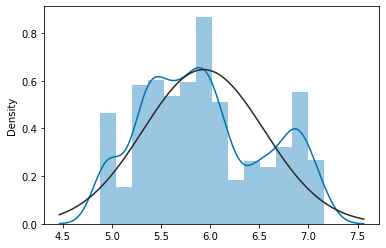

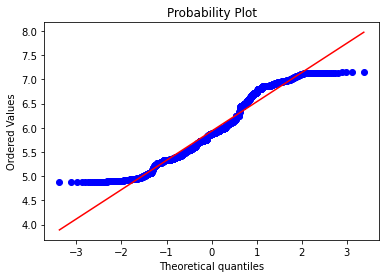

In [136]:
from scipy.stats import boxcox

close_price = boxcox(dslSG_2['CloseSG'], 0.01)
sns.distplot(close_price, fit=norm);
fig = plt.figure()
res = stats.probplot(close_price, plot=plt)

In [ ]:
Распределение стало более похожим на мультимодальное. Сделаем еще одно преобразование для приведения к нормальному.

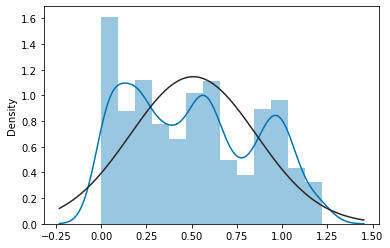

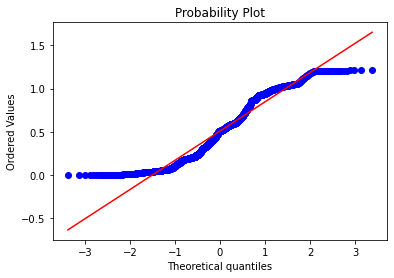

In [139]:
close_price_norm = np.abs(close_price - close_price.mean())
sns.distplot(close_price_norm, fit=norm);
fig = plt.figure()
res = stats.probplot(close_price_norm, plot=plt)

Лучше не стало, распределение далеко от нормального, больше похоже на экспоненциальное распределение (т.е. на первый график). Посмотрим на распределение всех остальных признаков. Для этого выбираются только числовые данные.

In [141]:
list(set(dslSG_2.dtypes.tolist())) #смотрим, какие типы данных имеем в выборке

[dtype('float64')]

В нашей таблице представлены только числовые параметры, поэтому строим распределение сразу по ней без вывода в отдельный объект

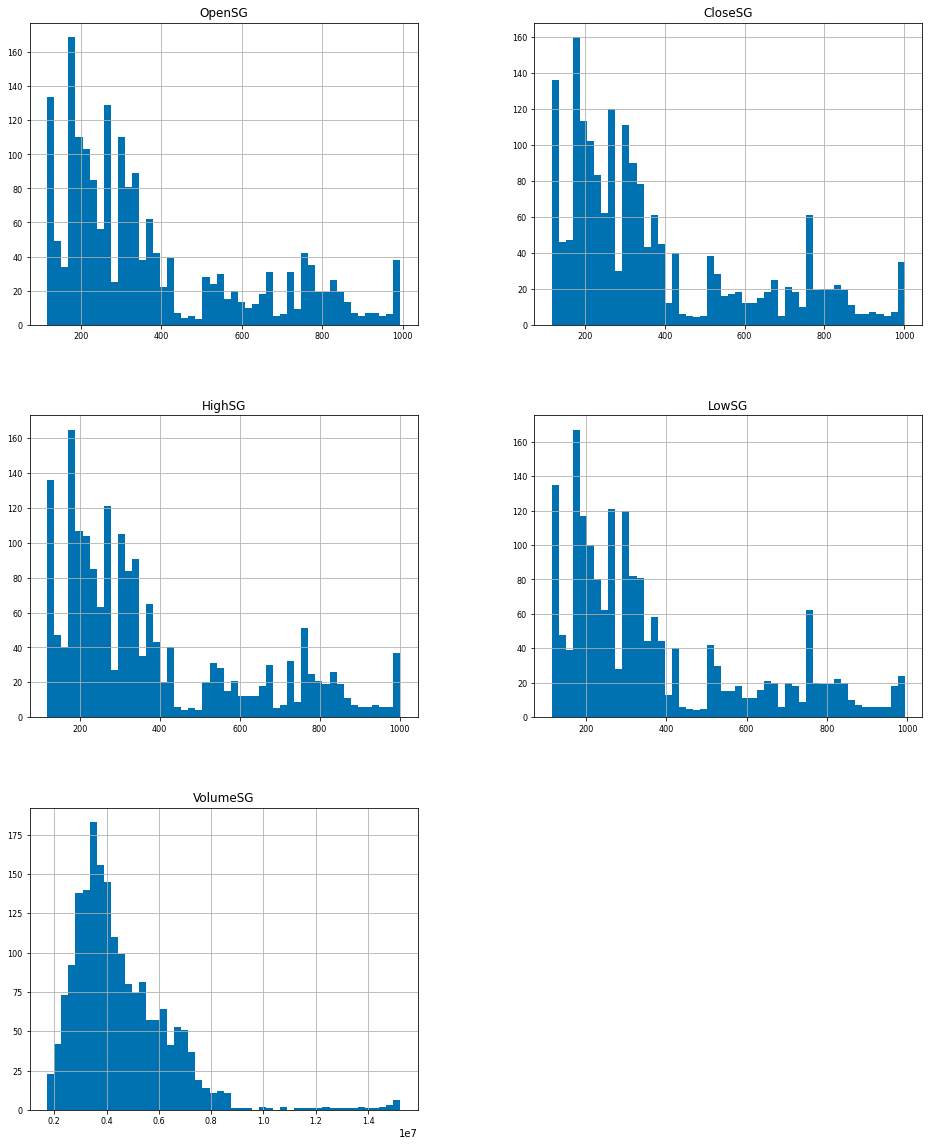

In [142]:
dslSG_2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

По графикам видим, что распределение величин Open, Close, High и Low представляется одинаковым, что выглядит достаточно логично, ввиду того, что цена за определенный промежуток времени не может существенно изменяться. Распределение признака Volume представлено иначе, похоже на нормальное, но с протяженной/ удлиненной правой частью. Проверим корреляцию всех параметров

In [164]:
corr_dslSG_2 = dslSG_2.corr()['CloseSG']
correlated_features_list = corr_dslSG_2[abs(corr_dslSG_2) > 0.0000000000000000001].sort_values(ascending=False)
print("Представленные признаки имеют сильную корреляцию с целевой переменной:\n{}".format(correlated_features_list))

Представленные признаки имеют сильную корреляцию с целевой переменной:
CloseSG     1.000000
OpenSG      0.999985
LowSG       0.999984
HighSG      0.999979
VolumeSG   -0.386112
Name: CloseSG, dtype: float64


Визуализируем полученную информацию

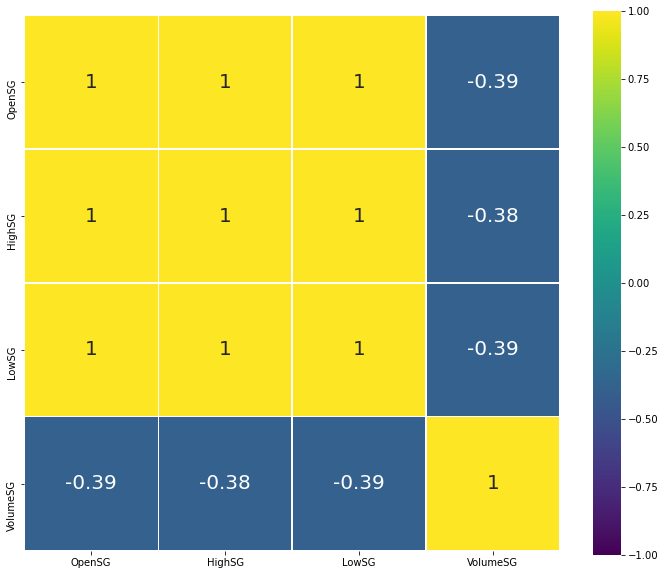

In [167]:
corr = dslSG_2.drop('CloseSG', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 20}, square=True);

Таким образом, мы убедились в выше приведенной гипотезе о зависимости параметров Open, Close, High и Low между собой. Также установлено, что параметр объема и цена закрытия имеет обратную корреляционную связь. Построим диаграмму рассеяния для этих параметров для наглядности

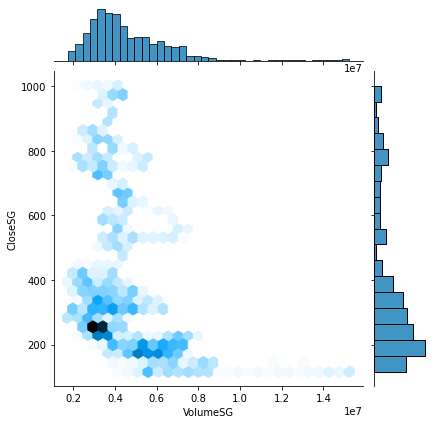

In [153]:
sns.jointplot(x='VolumeSG', y='CloseSG', data=dslSG_2, kind='hex');

Таким образом, проведен разведочный анализ исходной выборки, определены отсутствующие значения, проведено их восстановление методом линейной интерполяции, а также сглаживание исходных параметров. Установлено, что признаки  Open, Close, High и Low зависимы, а Volume имеет обратную корреляцию с целевой переменной.